## Load libraries

In [95]:
import tensorflow_text as tf_txt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

## Load data

In [31]:
PATH = os.getcwd() + "/Data"
folders = os.listdir(PATH)
data = []

for folder in folders:
    files = os.listdir(os.path.join(PATH, folder))
    for file in files:
        try:
            with open(os.path.join(PATH, folder,file)) as f:
                contents = " ".join(f.readlines())
                data.append([file.split(".")[0], folder, contents])
                f.close()
        except Exception as e:
            pass

df = pd.DataFrame(data, columns=['ID', 'Category', 'Content'])
df.head(10)

,ID,Category,Content
0,15697,Entertainment,\n In article <1993Apr21.001707.9999@ucsu.Colo...
1,15965,Entertainment,"\n ""The security of the system should depend o..."
2,15212,Entertainment,Message-ID: <1qn1ic$hp6@access.digex.net>\n NN...
3,15752,Entertainment,\n 1) I think that most of us can afford a sta...
4,15250,Entertainment,\n Brad Templeton (brad@clarinet.com) wrote:\n...
5,15208,Entertainment,\n -------------------------------------------...
6,16039,Entertainment,"\n ""Jon \\lnes"" <jon@ifi.uio.no> writes:\n >A ..."
7,15742,Entertainment,\n In article <1r6g1n$rvb@access.digex.net> st...
8,15378,Entertainment,\n U23590@uicvm.uic.edu writes:\n >The cryptog...
9,52755,Entertainment,"\n \n Yes, I know it's nowhere near Christmas ..."


## Data analysis and processing

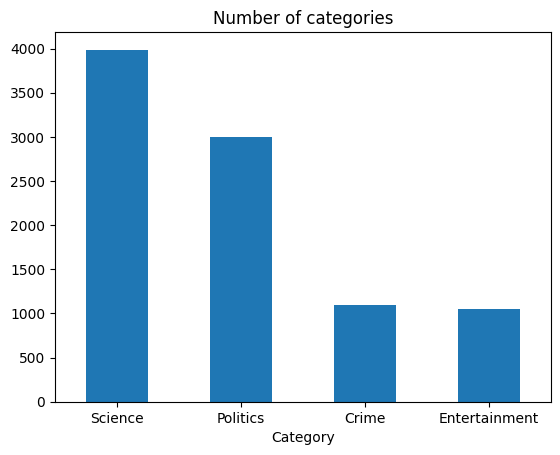

In [25]:
df['Category'].value_counts().plot.bar()
plt.title("Number of categories")
plt.xticks(rotation=0)
plt.show()

In [26]:
df['Category'].value_counts()

Category
Science          3987
Politics         3001
Crime            1099
Entertainment    1052
Name: count, dtype: int64

In [28]:
df.shape

(9139, 3)

In [50]:
df["Content"][0]

"\n In article <1993Apr21.001707.9999@ucsu.Colorado.EDU> andersom@spot.Colorado.EDU (Marc Anderson) writes:\n [...]\n >\n >(the date I have for this is 1-26-93)\n >\n >note Clinton's statements about encryption in the 3rd paragraph..  I guess\n >this statement doesen't contradict what you said, though.\n >\n >--- cut here ---\n >\n >        WASHINGTON (UPI) -- The War on Drugs is about to get a fresh\n >start, President Clinton told delegates to the National Federation\n >of Police Commisioners convention in Washington.\n >        In the first speech on the drug issue since his innaugural,\n >Clinton said that his planned escalation of the Drug War ``would make\n >everything so far seem so half-hearted that for all practical\n [...]\n \n I just found out from my source that this article was a joke.  Heh heh..  \n It seemed pretty damn convincing to me from the start -- I just didn't\n notice the smiley at the end of the article, and there were a few other\n hints which I should of caug

In [98]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...


True

In [114]:
stop_words = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [115]:
wordnet_lemmatizer = WordNetLemmatizer()

def preprocessing(text):
    tokenizer = re.compile(r'[^\w]+')
    tokenized = tokenizer.split(text)
    tokenized = [w.lower() for w in tokenized]
    filtered_sentence = [w for w in tokenized if not w.lower() in stop_words]
    filtered_sentence = [re.sub(r'\d+', '', w) for w in filtered_sentence if w.isalpha() and len(w) > 3]
    filtered_sentence = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_sentence if not w in stop_words]
    return filtered_sentence

In [118]:
df["Clean content"] = df["Content"].apply(lambda x: preprocessing(x))

In [119]:
print(df["Clean content"][0])

['article', 'ucsu', 'colorado', 'andersom', 'spot', 'colorado', 'marc', 'anderson', 'write', 'date', 'note', 'clinton', 'statements', 'encryption', 'paragraph', 'guess', 'statement', 'doesen', 'contradict', 'say', 'though', 'washington', 'drug', 'fresh', 'start', 'president', 'clinton', 'tell', 'delegate', 'national', 'federation', 'police', 'commisioners', 'convention', 'washington', 'first', 'speech', 'drug', 'issue', 'since', 'innaugural', 'clinton', 'say', 'plan', 'escalation', 'drug', 'would', 'make', 'everything', 'seem', 'half', 'hearted', 'practical', 'find', 'source', 'article', 'joke', 'seem', 'pretty', 'damn', 'convince', 'start', 'notice', 'smiley', 'article', 'hint', 'catch', 'anyway', 'guess', 'joke', 'turn', 'resemble', 'clinton', 'true', 'feel', 'least', 'extent', 'sorry', 'marc', 'andersom', 'spot', 'colorado']


In [120]:
df.head()

,ID,Category,Content,Clean content
0,15697,Entertainment,\n In article <1993Apr21.001707.9999@ucsu.Colo...,"[article, ucsu, colorado, andersom, spot, colo..."
1,15965,Entertainment,"\n ""The security of the system should depend o...","[security, system, depend, secrecy, key, secre..."
2,15212,Entertainment,Message-ID: <1qn1ic$hp6@access.digex.net>\n NN...,"[message, access, digex, nntp, post, host, acc..."
3,15752,Entertainment,\n 1) I think that most of us can afford a sta...,"[think, afford, stamp, envelope, cost, print, ..."
4,15250,Entertainment,\n Brad Templeton (brad@clarinet.com) wrote:\n...,"[brad, templeton, brad, clarinet, write, occur..."
